In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2                # Open cv library for image viewing
import os                 
import PIL                # PIL library for image viewing and modification
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive                        # permitting access to google drive
drive.mount('/content/gdrive', force_remount =True)
dataset_path = '/content/gdrive/MyDrive/AugmentedImages'          

Mounted at /content/gdrive


In [3]:
import pathlib
data_dir = pathlib.Path(dataset_path)
data_dir


PosixPath('/content/gdrive/MyDrive/AugmentedImages')

In [ ]:
list(data_dir.glob('*/*.png'))[:5]          # View the first 5 items in directory

In [4]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)                                  # Give the no of images in directory

795


In [6]:
healthy = list(data_dir.glob('healthy/*'))
healthy[:5]                                       # List the first 5 images in Healthy label


[PosixPath('/content/gdrive/MyDrive/AugmentedImages/healthy/dr_16_1117.png'),
 PosixPath('/content/gdrive/MyDrive/AugmentedImages/healthy/dr_46_5523.png'),
 PosixPath('/content/gdrive/MyDrive/AugmentedImages/healthy/dr_48_8992.png'),
 PosixPath('/content/gdrive/MyDrive/AugmentedImages/healthy/dr_1_3861.png'),
 PosixPath('/content/gdrive/MyDrive/AugmentedImages/healthy/dr_31_4587.png')]

In [7]:
parkinson = list(data_dir.glob('parkinson/*'))    # List the first 5 images in Parkinson label

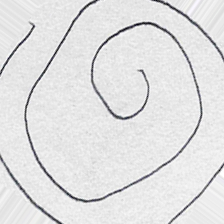

In [8]:
PIL.Image.open(str(healthy[1]))
                                                   # View the first image in Healthy label

In [ ]:
PIL.Image.open(str(parkinson[10]))           # View the first 10 images in Parkinson label

In [9]:
images_dict = {                                                                   # Create a dictionary for labeld
    'healthy': list(data_dir.glob('healthy/*')),
    'parkinson': list(data_dir.glob('parkinson/*')),
}

In [10]:
labels_dict = {
    'healthy': 0,
    'parkinson': 1,
}

In [11]:
images_dict['healthy'][:5]

[PosixPath('/content/gdrive/MyDrive/AugmentedImages/healthy/dr_16_1117.png'),
 PosixPath('/content/gdrive/MyDrive/AugmentedImages/healthy/dr_46_5523.png'),
 PosixPath('/content/gdrive/MyDrive/AugmentedImages/healthy/dr_48_8992.png'),
 PosixPath('/content/gdrive/MyDrive/AugmentedImages/healthy/dr_1_3861.png'),
 PosixPath('/content/gdrive/MyDrive/AugmentedImages/healthy/dr_31_4587.png')]

In [12]:
images_dict['parkinson'][:5]

[PosixPath('/content/gdrive/MyDrive/AugmentedImages/parkinson/dr_47_2217.png'),
 PosixPath('/content/gdrive/MyDrive/AugmentedImages/parkinson/dr_3_3160.png'),
 PosixPath('/content/gdrive/MyDrive/AugmentedImages/parkinson/dr_46_7367.png'),
 PosixPath('/content/gdrive/MyDrive/AugmentedImages/parkinson/dr_48_4943.png'),
 PosixPath('/content/gdrive/MyDrive/AugmentedImages/parkinson/dr_39_969.png')]

In [13]:
img = cv2.imread(str(images_dict['parkinson'][1]))                # Get the shape of the image
img.shape

(224, 224, 3)

In [14]:
cv2.resize(img,(180,180)).shape                         # Resize the image to 180X180 pixels

(180, 180, 3)

In [15]:
X, y = [], []                                                     # Resize all images to given size

for name, images in images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(labels_dict[name])

In [16]:
X = np.array(X)
y = np.array(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, random_state=0)              # Split data into training and testing sets

In [17]:
X_train_scaled = X_train / 255                      # Normalizing image pixels in range [0-1]
X_test_scaled = X_test / 255

In [18]:
model = Sequential([                                              # Building a Convolution Neural Network with "relu" and "softmax" functions
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(2)
])


In [19]:
model.compile(optimizer='rmsprop',                                                      # Training the model
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10,batch_size=100)                              

Epoch 1/10
6/6 [==============================] - 13s 217ms/step - loss: 0.6982 - accuracy: 0.4676
Epoch 2/10
6/6 [==============================] - 1s 90ms/step - loss: 0.6924 - accuracy: 0.5396
Epoch 3/10
6/6 [==============================] - 1s 92ms/step - loss: 0.6918 - accuracy: 0.5396
Epoch 4/10
6/6 [==============================] - 1s 91ms/step - loss: 0.6915 - accuracy: 0.5396
Epoch 5/10
6/6 [==============================] - 1s 91ms/step - loss: 0.6912 - accuracy: 0.5396
Epoch 6/10
6/6 [==============================] - 1s 89ms/step - loss: 0.6911 - accuracy: 0.5396
Epoch 7/10
6/6 [==============================] - 1s 90ms/step - loss: 0.6909 - accuracy: 0.5396
Epoch 8/10
6/6 [==============================] - 1s 90ms/step - loss: 0.6907 - accuracy: 0.5396
Epoch 9/10
6/6 [==============================] - 1s 90ms/step - loss: 0.6905 - accuracy: 0.5396
Epoch 10/10
6/6 [==============================] - 1s 89ms/step - loss: 0.6905 - accuracy: 0.5396


In [ ]:
model.evaluate(X_test_scaled,y_test)                                              # Testing the model on test data

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()                                                # Converting ML model to .tflite model

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)